In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import scipy.stats as stats

In [111]:
# Toy data generation 
# Y=f(X1,X2)=alpha+beta1*X1+ beta2*X2

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 2
beta = 2.5

# Size of dataset
size = 100

# Predictor variable
X = np.random.randn(size)

# Simulate outcome variable
Y = alpha + beta*X+ np.random.randn(size)*sigma


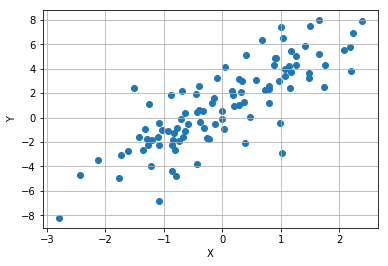

In [112]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6,4))
axes.scatter(X, Y)
axes.set_ylabel('Y'); axes.set_xlabel('X')
axes.grid(True)

In [113]:
def f(x, beta, alpha):
    return alpha + beta*x

Regr_model=pm.Model()

with Regr_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=1)
    sigma = pm.HalfNormal('sigma', sd=1)   # This RV always takes positive real values

    # Expected value of outcome
    # The Expected value of the likelihood distribution is represented by the function f(x,theta)
    # where theta={alpha, beta1, beta2}
    mu = f(X, beta, alpha)
    # Likelihood (sampling distribution) of observations
    # observed always represents y-values in regression tasks
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)



Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:08<00:00, 1363.78draws/s]


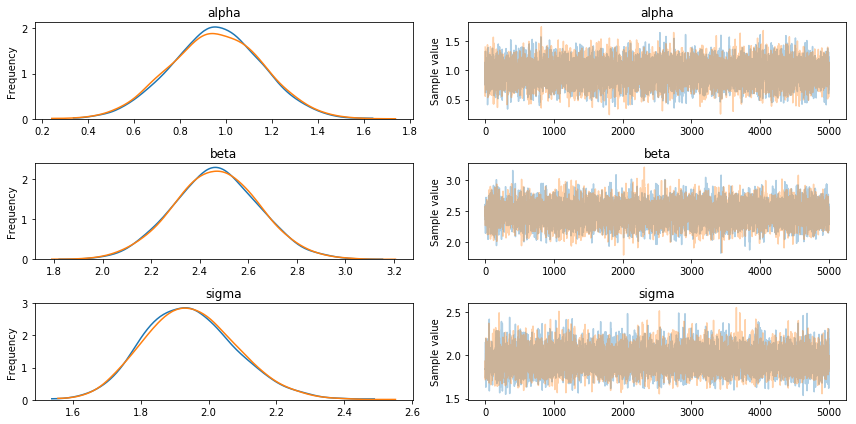

In [130]:
##PyMC3’s step_methods submodule contains the following samplers:
# NUTS,
# Metropolis,
# Slice,
# HamiltonianMC,
#BinaryMetropolis. 

iterations=5000
with Regr_model:
    step=pm.NUTS()
    trace = pm.sample(iterations, step)
pm.traceplot(trace);

In [131]:
## Confidence interval
# Extract the alpha and beta samples
alpha_samples = trace["alpha"][5000:, None]
beta_samples = trace["beta"][5000:]

beta_samples.shape

(5000, 1)

Text(0.5,1,'Distribution of $\\alpha$ with 5000 samples')

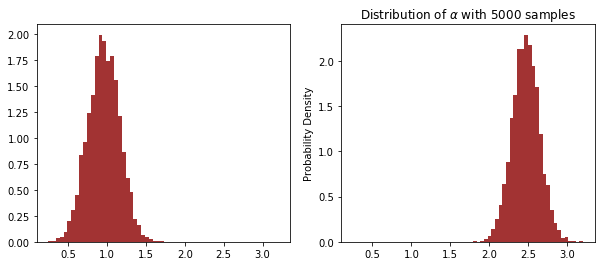

In [132]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))

axes[0].hist(alpha_samples, histtype='stepfilled',color = 'darkred', bins=30, alpha=0.8, density=True)

plt.ylabel('Probability Density')
plt.title(r"""Distribution of $\alpha$ with %d samples""" % 5000)

axes[1].hist(beta_samples, histtype='stepfilled',color = 'darkred', bins=30, alpha=0.8, density=True);
plt.title(r"""Distribution of $\alpha$ with %d samples""" % 5000)


In [133]:
x_test = np.linspace(-5,5, 1e3)[:, None]


/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [134]:
y_test = f(x_test.T, beta_samples, alpha_samples)
quantiles = stats.mstats.mquantiles(y_test, [0.025, 0.975], axis=0)

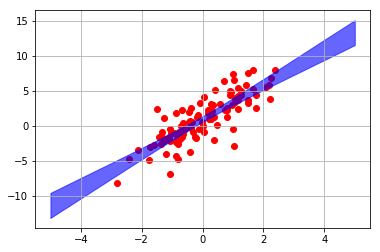

In [135]:
plt.scatter(X,Y, color='r')

plt.fill_between(x_test[:, 0], *quantiles, alpha=0.6, color='blue', label = '95% CI')
plt.grid(True)